In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def func(X):
    """
    inputs: 
        X: design vector
    outputs:
        value of the function a the given design vector
    """
    return 1 / (1 + X[0]**2 + X[1]**2)

In [3]:
def acceptance_probability(old_cost, new_cost, ti):
    """
    inputs:
        old and new costs of the opt func
        t: temp at ith iteration
    outputs:
        accpet probability
    """
    return np.exp(-np.sum(new_cost - old_cost) / ti)

In [4]:
def neighbor(sol, T0, Ti, lower, upper):
    """
    inputs:
        sol: current sol to the problem
        T0: initial temp
        Ti: temp at ith iteration
        lower and upper are the bounds
    outputs:
        neighbor sol to current sol
    """
    return sol *(1 - Ti/T0 ) + (Ti/T0) * random.uniform(lower, upper)

In [5]:
def anneal(lower, upper):
    """
    inputs:
        lower and upper are the limits for the search space
    outputs:
        best_sol to the problem
        crossponding value of the function
        history to visualize
    """
    sol = np.random.randint(low=lower, high=upper, size=(2))
    print(f"The initial solution is {sol}")
    old_cost = func(sol)
    T0 = 1.0                # The initial value of temperature
    T_min = 0.00001         # stopping criterion
    alpha = 0.9             # used to decrease temperature 
    Ti = T0
    best_sol = sol
    best_cost = old_cost
    history = [sol]
    
    while Ti > T_min:
        for _ in range(100):
            new_sol = neighbor(sol, T0, Ti, lower, upper)
            new_cost = func(new_sol)
            if new_cost > old_cost:
                sol = new_sol
                old_cost = new_cost
                best_sol = new_sol if new_cost > best_cost else best_sol
                best_cost = func(best_sol)
            else:
                ap = acceptance_probability(old_cost, new_cost, Ti)
                if ap > np.random.random():
                    sol = new_sol
                    old_cost = new_cost
        
        history.append(sol)
        Ti = alpha*Ti
            
    return best_sol, best_cost, history

The initial solution is [-7  6]
Best solution is [1.63250779e-06 1.63250779e-06], function at this point is 0.99999999999467


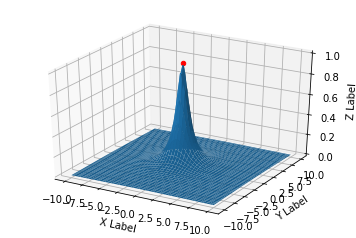

In [6]:
lower = -10
upper =  10

sol, cost, history = anneal(lower=lower, upper=upper)
print(f'Best solution is {sol}, function at this point is {cost}')

# This part is used for visualization

x = np.linspace(start=lower, stop=upper, num=100)
y = np.linspace(start=lower, stop=upper, num=100)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array([func([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.set_zlim(0, 1)
ax.plot_surface(X, Y, Z)
ax.scatter(sol[0], sol[1], cost, c='red')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()